In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import quandl
from datetime import datetime
import pandas_datareader.data as web

sns.set_style('whitegrid')
%matplotlib inline

In [4]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    globals()[stock] = quandl.get('WIKI/{}'.format(stock), start_date=start, end_date=end)

In [5]:
AAPL.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,245.000000,245.000000,245.000000,245.000000,2.450000e+02,245.000000,245.0,245.000000,245.000000,245.000000,245.000000,2.450000e+02
mean,157.927520,159.042918,156.767228,157.965892,2.820871e+07,0.005143,1.0,157.565556,158.678721,156.407526,157.603717,2.820871e+07
std,11.571454,11.735969,11.497910,11.604134,1.199703e+07,0.056804,0.0,11.939714,12.107708,11.858877,11.970204,1.199703e+07
min,138.740000,138.790000,137.050000,138.680000,1.394898e+07,0.000000,1.0,137.616186,137.665781,135.939876,137.556672,1.394898e+07
25%,147.170000,148.280000,145.810000,147.510000,2.024719e+07,0.000000,1.0,146.565319,147.680793,144.852269,146.315148,2.024719e+07
50%,156.730000,157.690000,155.270000,156.160000,2.495955e+07,0.000000,1.0,156.610000,157.690000,155.110100,156.070000,2.495955e+07
75%,169.950000,170.590000,168.440000,169.452000,3.271004e+07,0.000000,1.0,169.950000,170.590000,168.440000,169.452000,3.271004e+07
max,179.370000,180.615000,178.250000,179.260000,8.543608e+07,0.630000,1.0,179.370000,180.615000,178.250000,179.260000,8.543608e+07


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2017-03-09 to 2018-03-08
Data columns (total 12 columns):
Open           245 non-null float64
High           245 non-null float64
Low            245 non-null float64
Close          245 non-null float64
Volume         245 non-null float64
Ex-Dividend    245 non-null float64
Split Ratio    245 non-null float64
Adj. Open      245 non-null float64
Adj. High      245 non-null float64
Adj. Low       245 non-null float64
Adj. Close     245 non-null float64
Adj. Volume    245 non-null float64
dtypes: float64(12)
memory usage: 24.9 KB


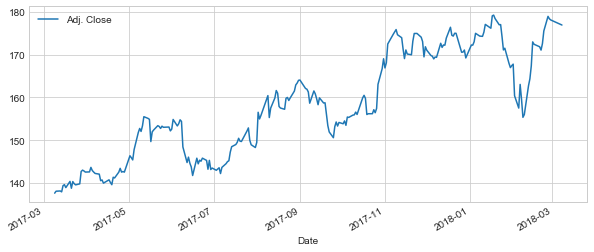

In [7]:
AAPL['Adj. Close'].plot(legend=True, figsize=(10, 4))

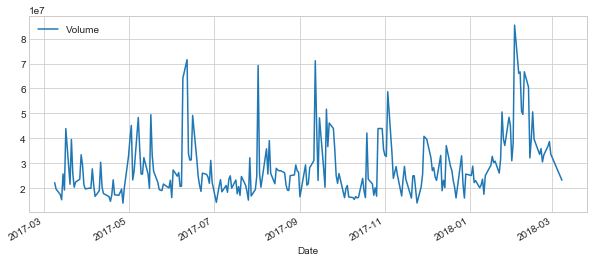

In [8]:
AAPL['Volume'].plot(legend=True, figsize=(10, 4))

In [9]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj. Close'], ma)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  after removing the cwd from sys.path.


In [10]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50
Date,,,,,,,,,,,,,,,
2017-03-09,138.74,138.7900,137.050,138.68,22155904.0,0.0,1.0,137.616186,137.665781,135.939876,137.556672,22155904.0,NaN,NaN,NaN
2017-03-10,139.25,139.3571,138.640,139.14,19612801.0,0.0,1.0,138.122055,138.228288,137.516996,138.012946,19612801.0,NaN,NaN,NaN
2017-03-13,138.85,139.4300,138.820,139.20,17421717.0,0.0,1.0,137.725295,138.300597,137.695538,138.072460,17421717.0,NaN,NaN,NaN
2017-03-14,139.30,139.6500,138.840,138.99,15309065.0,0.0,1.0,138.171650,138.518815,137.715376,137.864161,15309065.0,NaN,NaN,NaN
2017-03-15,139.41,140.7501,139.025,140.46,25691774.0,0.0,1.0,138.280759,139.610004,137.898878,139.322254,25691774.0,NaN,NaN,NaN


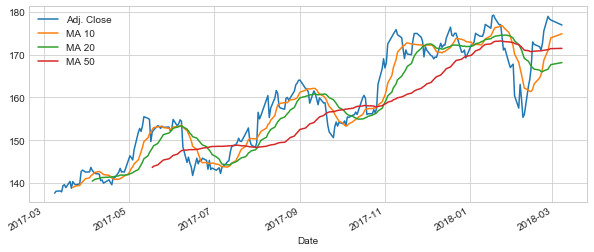

In [11]:
AAPL[['Adj. Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [12]:
AAPL['Daily Return'] = AAPL['Adj. Close'].pct_change()

In [13]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,,,,,,,
2017-03-09,138.74,138.7900,137.050,138.68,22155904.0,0.0,1.0,137.616186,137.665781,135.939876,137.556672,22155904.0,NaN,NaN,NaN,NaN
2017-03-10,139.25,139.3571,138.640,139.14,19612801.0,0.0,1.0,138.122055,138.228288,137.516996,138.012946,19612801.0,NaN,NaN,NaN,0.003317
2017-03-13,138.85,139.4300,138.820,139.20,17421717.0,0.0,1.0,137.725295,138.300597,137.695538,138.072460,17421717.0,NaN,NaN,NaN,0.000431
2017-03-14,139.30,139.6500,138.840,138.99,15309065.0,0.0,1.0,138.171650,138.518815,137.715376,137.864161,15309065.0,NaN,NaN,NaN,-0.001509
2017-03-15,139.41,140.7501,139.025,140.46,25691774.0,0.0,1.0,138.280759,139.610004,137.898878,139.322254,25691774.0,NaN,NaN,NaN,0.010576


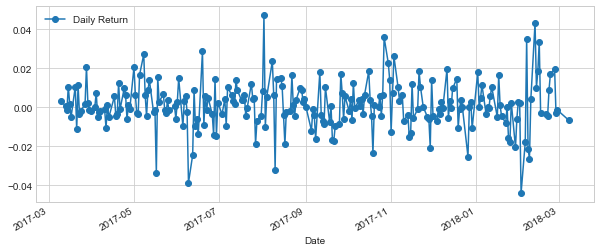

In [14]:
AAPL['Daily Return'].plot(figsize=(10, 4), legend=True, marker='o')

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


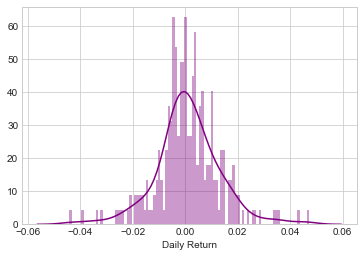

In [15]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

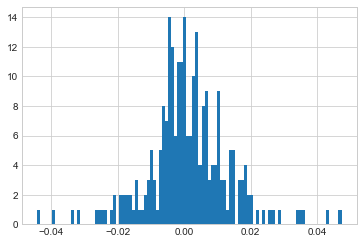

In [16]:
AAPL['Daily Return'].hist(bins=100)

In [17]:
closing_df = DataFrame()
for stock in tech_list:
    closing_df[stock] = quandl.get('WIKI/{}'.format(stock), start_date=start, end_date=end)['Adj. Close']

In [18]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-03-09,137.556672,838.68,63.704853,853.00
2017-03-10,138.012946,843.25,63.901685,852.46
2017-03-13,138.072460,845.54,63.685169,854.59
2017-03-14,137.864161,845.62,63.389921,852.53
2017-03-15,139.322254,847.20,63.724536,852.97


In [19]:
tech_rets = closing_df.pct_change()

In [20]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-03-09,NaN,NaN,NaN,NaN
2017-03-10,0.003317,0.005449,0.003090,-0.000633
2017-03-13,0.000431,0.002716,-0.003388,0.002499
2017-03-14,-0.001509,0.000095,-0.004636,-0.002411
2017-03-15,0.010576,0.001868,0.005279,0.000516


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


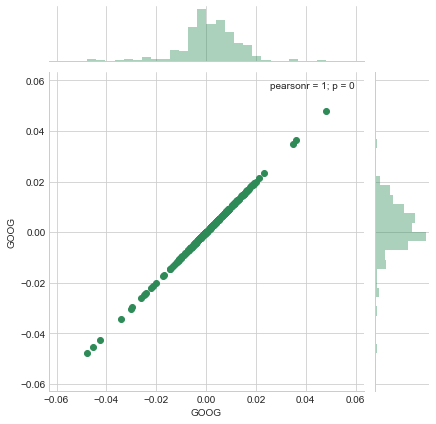

In [21]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


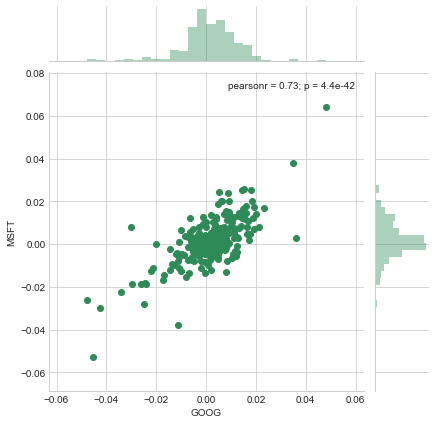

In [22]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


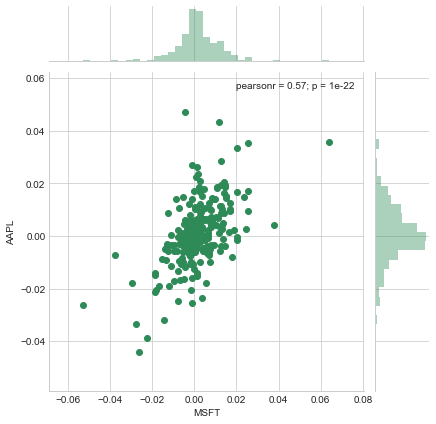

In [23]:
sns.jointplot('MSFT', 'AAPL', tech_rets, kind='scatter', color='seagreen')

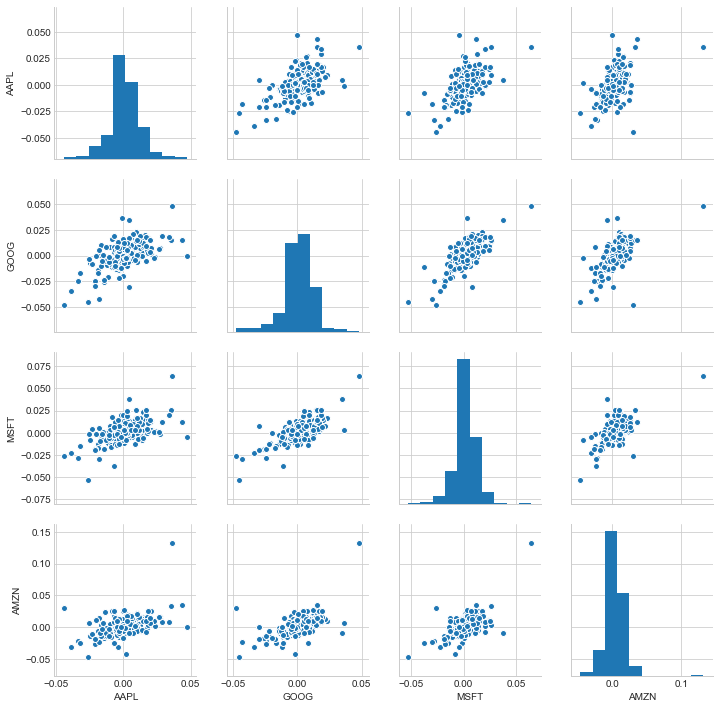

In [24]:
sns.pairplot(tech_rets.dropna())

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


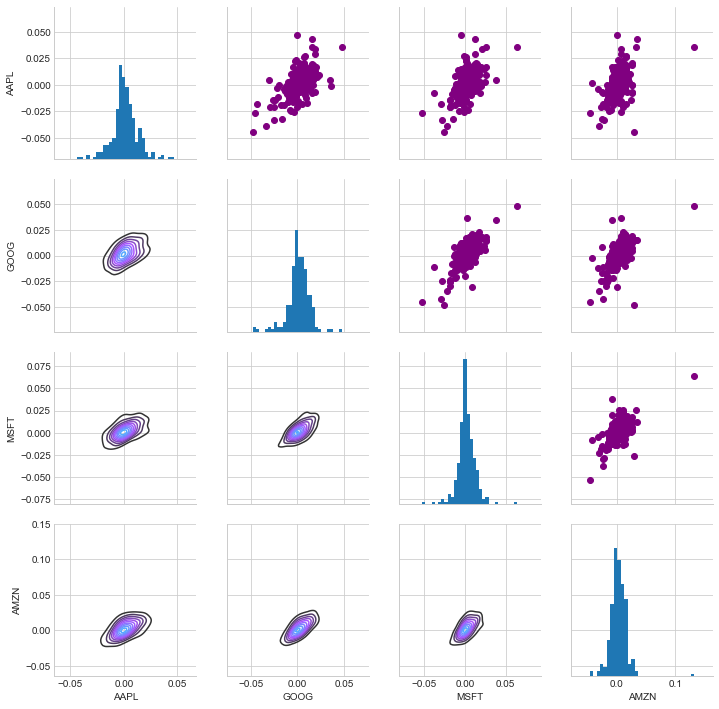

In [25]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


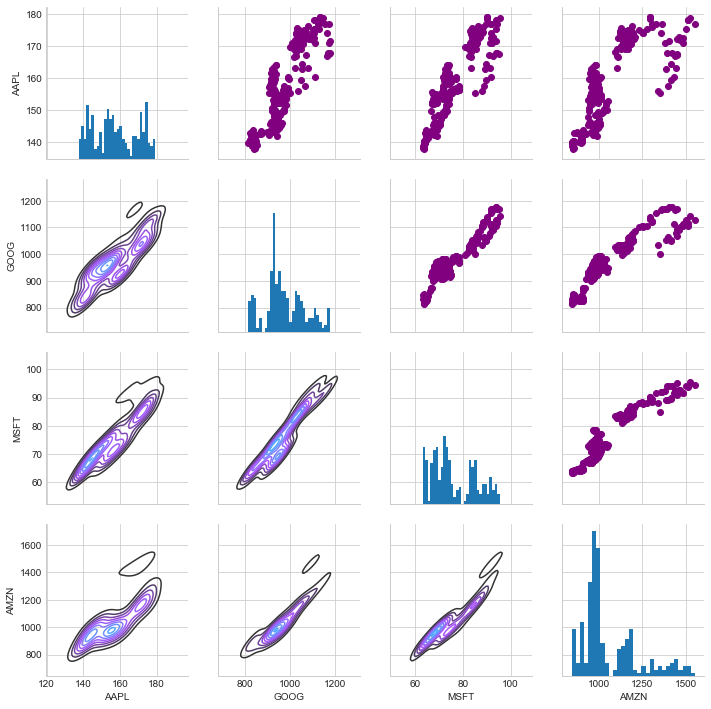

In [26]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

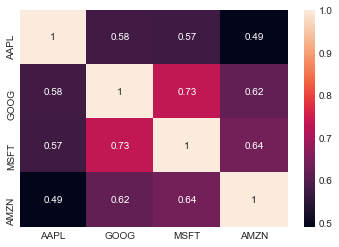

In [27]:
sns.heatmap(tech_rets.corr(), annot=True)

In [28]:
rets = tech_rets.dropna()

In [29]:
rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-03-10,0.003317,0.005449,0.003090,-0.000633
2017-03-13,0.000431,0.002716,-0.003388,0.002499
2017-03-14,-0.001509,0.000095,-0.004636,-0.002411
2017-03-15,0.010576,0.001868,0.005279,0.000516
2017-03-16,0.001637,0.001865,-0.001699,0.000528


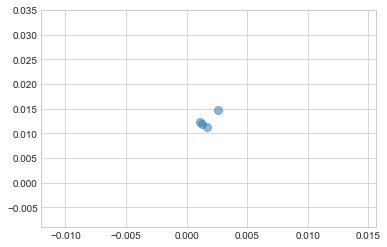

In [30]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)

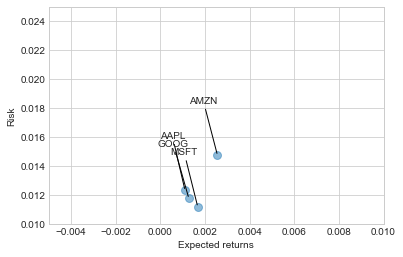

In [31]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)
plt.ylim([0.01, 0.025])
plt.xlim([-0.005, 0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(0, 50),
                textcoords='offset points', ha='right', va='bottom',
                arrowprops=dict(arrowstyle='-', connectionstyle='arc3'))

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


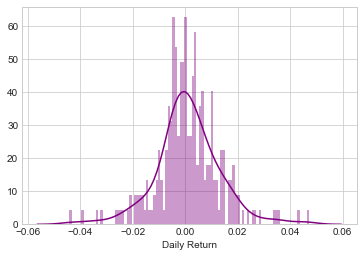

In [32]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [33]:
rets['AAPL'].quantile(0.05)

-0.01875658832768144

In [43]:
# 1年を基準にします。
days = 365

# 1日分の差分です。
dt = 1/days

# 日々の変動の平均を計算します。
mu = rets.mean()['GOOG']

# ボラティリティ（volatility：株価の変動の振れ幅）を変動の標準偏差で計算します。
sigma = rets.std()['GOOG']

In [47]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' この関数は、シミュレーションの結果の価格リストを返します。'''
    
    # 戻り値となる価格のリストを返します。
    price = np.zeros(days)
    price[0] = start_price
    # Shock と Driftです。
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # 指定された日数のところまで、計算します。
    for x in range(1,days):
        #  shockを計算します
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Driftを計算します。
        drift[x] = mu * dt
        # これらを使って価格を計算します。
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [50]:
GOOG.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-03-09,836.00,842.000,834.21,838.68,1261517.0,0.0,1.0,836.00,842.000,834.21,838.68,1261517.0
2017-03-10,843.28,844.910,839.50,843.25,1704024.0,0.0,1.0,843.28,844.910,839.50,843.25,1704024.0
2017-03-13,844.00,848.685,843.25,845.54,1223647.0,0.0,1.0,844.00,848.685,843.25,845.54,1223647.0
2017-03-14,843.64,847.240,840.80,845.62,780198.0,0.0,1.0,843.64,847.240,840.80,845.62,780198.0
2017-03-15,847.59,848.630,840.77,847.20,1381474.0,0.0,1.0,847.59,848.630,840.77,847.20,1381474.0


In [53]:
print(GOOG.iloc[0,4])
print(mu, sigma)

1261517.0
0.0012776188837025405 0.011790898659095548


Text(0.5,1,'Monte Carlo Analysis for Google')

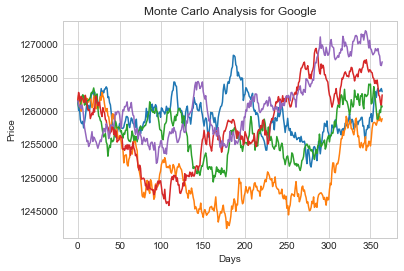

In [54]:
# 最初の終値から始めます。
start_price = GOOG.iloc[0,4]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [56]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

(array([1., 1., 2., ..., 0., 0., 1.]),
 array([1213477.80236698, 1214016.96966418, 1214556.13696138, ...,
        1320232.92721256, 1320772.09450976, 1321311.26180696]),
 <a list of 200 Patch objects>)

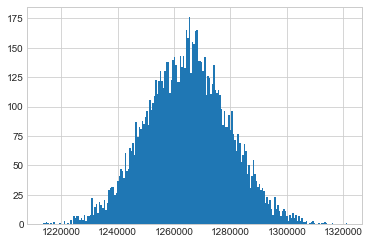

In [57]:
plt.hist(simulations, bins=200)

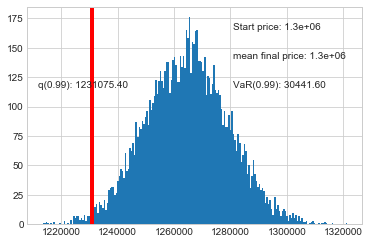

In [58]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s='Start price: {:0.2}'.format(start_price))
plt.figtext(0.6, 0.7, 'mean final price: {:0.2}'.format(simulations.mean()))
plt.figtext(0.6, 0.6, 'VaR(0.99): {:0.2f}'.format(start_price-q))
plt.figtext(0.15, 0.6, 'q(0.99): {:0.2f}'.format(q))

plt.axvline(x = q, linewidth=4, color='r')